In [0]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [78]:
gs_train_df=pd.read_csv("Google_Stock_Price_Train.csv")
gs_train_df


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [79]:
# here i have taken Date,open only 
gs_training_set = gs_train_df.iloc[:, 1:2].values
gs_training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [80]:
# feature scaling 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler(feature_range=(0,1))
gs_training_set_scaleed = sc.fit_transform(gs_training_set)
gs_training_set_scaleed

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
# Creating a data structure with 60 timesteps and 1 output

X_train = [] 
y_train = [] 
for i  in range(60,1258):
    X_train.append(gs_training_set_scaleed[i-60:i,0])
    y_train.append(gs_training_set_scaleed[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [82]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [83]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [0]:
#Reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [85]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

**Building RNN**

In [86]:
# importing the keras libraries  and packages
!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import LSTM


In [0]:
# initializing the RNN
rnnclassifier = Sequential()

In [0]:
# adding the first LSTM layer and some Dropout regularisation

rnnclassifier.add(LSTM(units = 50, return_sequences = True,input_shape = (X_train.shape[1],1)))
rnnclassifier.add(Dropout(0.2))

In [0]:
# Adding a second LSTM layer and some Dropout regularisation
rnnclassifier.add(LSTM(units = 50, return_sequences = True))
rnnclassifier.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation
rnnclassifier.add(LSTM(units = 50, return_sequences = True))
rnnclassifier.add(Dropout(0.2))

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
rnnclassifier.add(LSTM(units = 50))
rnnclassifier.add(Dropout(0.2))

In [0]:
# Adding the output layer
rnnclassifier.add(Dense(units = 1))

In [94]:
# Compiling the RNN
rnnclassifier.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
rnnclassifier.fit(X_train, y_train, epochs = 105, batch_size = 32)

Epoch 1/105
38/38 [==============================] - 4s 115ms/step - loss: 0.0374
Epoch 2/105
38/38 [==============================] - 4s 117ms/step - loss: 0.0065
Epoch 3/105
38/38 [==============================] - 5s 120ms/step - loss: 0.0061
Epoch 4/105
38/38 [==============================] - 4s 118ms/step - loss: 0.0053
Epoch 5/105
38/38 [==============================] - 5s 120ms/step - loss: 0.0051
Epoch 6/105
38/38 [==============================] - 4s 118ms/step - loss: 0.0059
Epoch 7/105
38/38 [==============================] - 5s 119ms/step - loss: 0.0060
Epoch 8/105
38/38 [==============================] - 5s 119ms/step - loss: 0.0049
Epoch 9/105
38/38 [==============================] - 5s 119ms/step - loss: 0.0041
Epoch 10/105
38/38 [==============================] - 5s 119ms/step - loss: 0.0052
Epoch 11/105
38/38 [==============================] - 5s 119ms/step - loss: 0.0045
Epoch 12/105
38/38 [==============================] - 5s 120ms/step - loss: 0.0041
Epoch 13/105


**Making the predictions and visualising the predicted values**

In [0]:
# Getting the real stock price of 2017
gs_test_df = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = gs_test_df.iloc[:, 1:2].values



In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((gs_train_df['Open'], gs_test_df['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(gs_test_df) - 60:].values


In [0]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [0]:
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = rnnclassifier.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

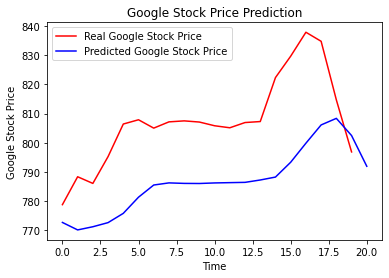

In [99]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()